In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import  SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
df_train=pd.read_csv('dataset/train.csv')
df_test=pd.read_csv('dataset/test.csv')

In [3]:
df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
missing_values=df_train.isnull().sum().sort_values(ascending=True)
print(missing_values[missing_values>0])

Electrical         1
MasVnrArea         8
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageYrBlt       81
GarageFinish      81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


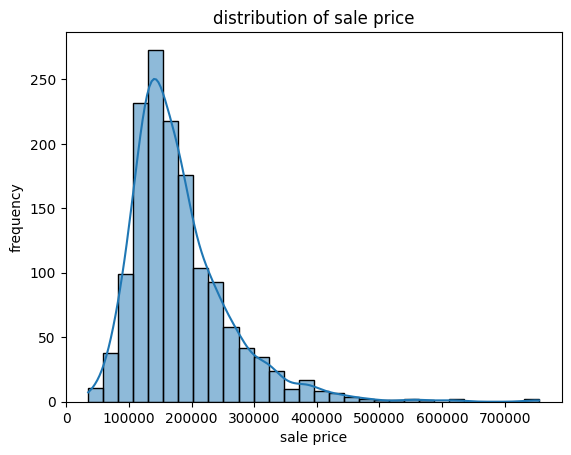

In [7]:
sns.histplot(df_train['SalePrice'],bins=30,kde=True)
plt.title('distribution of sale price')
plt.xlabel('sale price')
plt.ylabel('frequency')
plt.show()

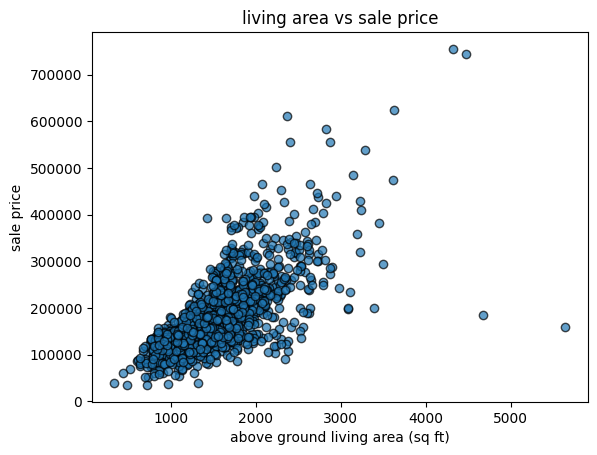

In [8]:
plt.Figure(figsize=(8,5))
plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'],alpha=0.7,edgecolor='black')
plt.title('living area vs sale price')
plt.xlabel('above ground living area (sq ft)')
plt.ylabel('sale price')
plt.show()

In [9]:
selected_feature=['OverallQual','GrLivArea','TotalBsmtSF','YearBuilt','Neighborhood','GarageCars','BsmtQual','KitchenQual','FullBath','LotArea']
df_train=df_train[selected_feature+['SalePrice']]
df_test=df_test[selected_feature]

In [10]:
df_train

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,Neighborhood,GarageCars,BsmtQual,KitchenQual,FullBath,LotArea,SalePrice
0,7,1710,856,2003,CollgCr,2,Gd,Gd,2,8450,208500
1,6,1262,1262,1976,Veenker,2,Gd,TA,2,9600,181500
2,7,1786,920,2001,CollgCr,2,Gd,Gd,2,11250,223500
3,7,1717,756,1915,Crawfor,3,TA,Gd,1,9550,140000
4,8,2198,1145,2000,NoRidge,3,Gd,Gd,2,14260,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,1999,Gilbert,2,Gd,TA,2,7917,175000
1456,6,2073,1542,1978,NWAmes,2,Gd,TA,2,13175,210000
1457,7,2340,1152,1941,Crawfor,1,TA,Gd,2,9042,266500
1458,5,1078,1078,1950,NAmes,1,TA,Gd,1,9717,142125


In [11]:
ordinal_mapping={'Ex':5,'Gd':4,'Ta':3,'Fa':2,'po':1,np.nan:0}
df_train['BsmtQual']=df_train['BsmtQual'].map(ordinal_mapping).fillna(0)
df_train['KitchenQual']=df_train['KitchenQual'].map(ordinal_mapping).fillna(0)
df_test['Bsmtqual']=df_test['BsmtQual'].map(ordinal_mapping).fillna(0)
df_test['KitchenQual']=df_test['KitchenQual'].map(ordinal_mapping).fillna(0)
imputer=SimpleImputer(strategy='median')
df_train[['TotalBsmtSF','GarageCars','LotArea']] =imputer.fit_transform(df_train[['TotalBsmtSF','GarageCars','LotArea']])
df_test[['TotalBsmtSF','GarageCars','LotArea']] =imputer.fit_transform(df_test[['TotalBsmtSF','GarageCars','LotArea']])

C:\Users\corvit\AppData\Local\Temp\ipykernel_10044\1645813545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BsmtQual']=df_train['BsmtQual'].map(ordinal_mapping).fillna(0)
C:\Users\corvit\AppData\Local\Temp\ipykernel_10044\1645813545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['KitchenQual']=df_train['KitchenQual'].map(ordinal_mapping).fillna(0)
C:\Users\corvit\AppData\Local\Temp\ipykernel_10044\1645813545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [12]:
df_train

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,Neighborhood,GarageCars,BsmtQual,KitchenQual,FullBath,LotArea,SalePrice
0,7,1710,856.0,2003,CollgCr,2.0,4.0,4.0,2,8450.0,208500
1,6,1262,1262.0,1976,Veenker,2.0,4.0,0.0,2,9600.0,181500
2,7,1786,920.0,2001,CollgCr,2.0,4.0,4.0,2,11250.0,223500
3,7,1717,756.0,1915,Crawfor,3.0,0.0,4.0,1,9550.0,140000
4,8,2198,1145.0,2000,NoRidge,3.0,4.0,4.0,2,14260.0,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953.0,1999,Gilbert,2.0,4.0,0.0,2,7917.0,175000
1456,6,2073,1542.0,1978,NWAmes,2.0,4.0,0.0,2,13175.0,210000
1457,7,2340,1152.0,1941,Crawfor,1.0,0.0,4.0,2,9042.0,266500
1458,5,1078,1078.0,1950,NAmes,1.0,0.0,4.0,1,9717.0,142125


In [13]:
encoder=OneHotEncoder(handle_unknown='ignore')
encoded_neighborhood=pd.DataFrame(encoder.fit_transform(df_train[['Neighborhood']]).toarray(),columns=encoder.get_feature_names_out())
df_train=df_train.drop(columns=['Neighborhood']).join(encoded_neighborhood)
encoded_neighborhood_test=pd.DataFrame(encoder.transform(df_test[['Neighborhood']]).toarray(),columns=encoder.get_feature_names_out())
df_test=df_test.drop(columns=['Neighborhood']).join(encoded_neighborhood)

with open("Neighborhood_encoder.pkl","wb")as f:
    joblib.dump(encoder,f)


In [14]:
df_train

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,GarageCars,BsmtQual,KitchenQual,FullBath,LotArea,SalePrice,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,1710,856.0,2003,2.0,4.0,4.0,2,8450.0,208500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1262,1262.0,1976,2.0,4.0,0.0,2,9600.0,181500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,1786,920.0,2001,2.0,4.0,4.0,2,11250.0,223500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1717,756.0,1915,3.0,0.0,4.0,1,9550.0,140000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2198,1145.0,2000,3.0,4.0,4.0,2,14260.0,250000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953.0,1999,2.0,4.0,0.0,2,7917.0,175000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,6,2073,1542.0,1978,2.0,4.0,0.0,2,13175.0,210000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,7,2340,1152.0,1941,1.0,0.0,4.0,2,9042.0,266500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,5,1078,1078.0,1950,1.0,0.0,4.0,1,9717.0,142125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_train['LotArea']=np.log1p(df_train['LotArea'])
df_train['GrLivArea']=np.log1p(df_train['GrLivArea'])
df_train['TotalBsmtSF']=np.log1p(df_train['TotalBsmtSF'])
df_train['SalePrice']=np.log1p(df_train['SalePrice'])
df_test['LotArea']=np.log1p(df_test['LotArea'])
df_test['GrLivArea']=np.log1p(df_test['GrLivArea'])
df_test['TotalBsmtSF']=np.log1p(df_test['TotalBsmtSF'])

In [16]:
X=df_train.drop(columns=['SalePrice'])
y=df_train['SalePrice']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_preds=lr.predict(x_test)
print('LinearRegression MSE:',mean_squared_error(y_test,lr_preds))

LinearRegression MSE: 0.024348636958570407


In [18]:
rf=LinearRegression()
rf.fit(X_train,y_train)
rf_preds=lr.predict(x_test)
print('LinearRegression MSE:',mean_squared_error(y_test,rf_preds))

LinearRegression MSE: 0.024348636958570407


In [19]:
best_model=lr
joblib.dump(best_model,'house_price_model.pkl')

['house_price_model.pkl']